1. Loading and Preprocessing (1 marks)
   
Load the Iris dataset from sklearn.

Drop the species column since this is a clustering problem.



In [2]:
# necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

In [4]:
# Loading  the Iris dataset
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


2.Clustering Algorithm Implementation (8 marks)

Implement the following two clustering algorithms:

A) KMeans Clustering (4 marks)

Provide a brief description of how KMeans clustering works.
Explain why KMeans clustering might be suitable for the Iris dataset.
Apply KMeans clustering to the preprocessed Iris dataset and visualize the clusters.

B) Hierarchical Clustering (4 marks)

Provide a brief description of how Hierarchical clustering works.
Explain why Hierarchical clustering might be suitable for the Iris dataset.
Apply Hierarchical clustering to the preprocessed Iris dataset and visualize the clusters.



>>Brief Description of KMeans Clustering:

KMeans is an unsupervised machine learning algorithm used to classify a dataset into a specified number of clusters, k. It works by:

Initializing k cluster centroids randomly.

Assigning each data point to the nearest centroid.

Recalculating the centroids based on the mean of the data points assigned to them.

Why KMeans Might Be Suitable for the Iris Dataset:
The Iris dataset consists of 4 numerical features that can naturally be grouped into clusters based on the similarity of these features.

KMeans is suitable for this dataset because it is effective in identifying well-separated clusters, and it works well when the data follows a spherical distribution (clusters that are roughly round).

Since the Iris dataset has multiple species, we can assume that KMeans can help group the data into similar species even without labels.

C:\Users\JOJO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


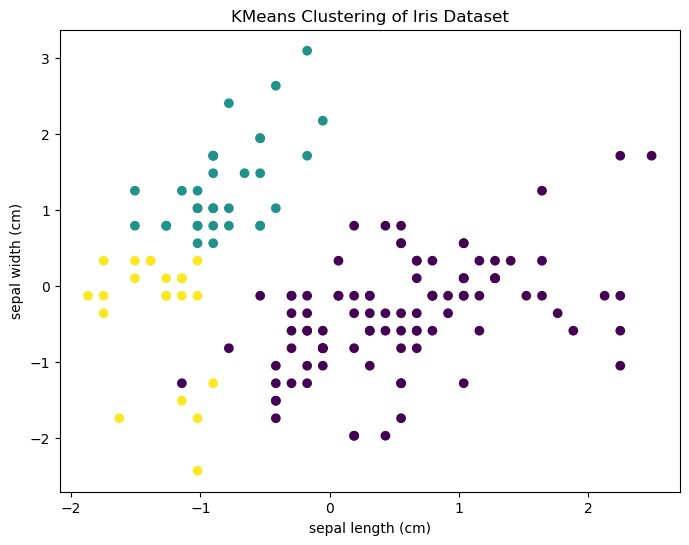

In [7]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

# Scaling the data for better clustering perfor
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# A) KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)

# Visualizing KMeans clusters
plt.figure(figsize=(8, 6))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('KMeans Clustering of Iris Dataset')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()



Brief Description of Hierarchical Clustering:

Hierarchical Clustering is an unsupervised machine learning algorithm that builds a hierarchy of clusters. It can be performed in two ways:

Agglomerative : Starts with individual data points as clusters and merges them iteratively based on distance (usually using methods like single, complete, or average linkage) until all points are in a single cluster.

Divisive : Starts with all data in a single cluster and iteratively splits it.

Why Hierarchical Clustering Might Be Suitable for the Iris Dataset:

Hierarchical clustering works well for data where the natural grouping of points is not fixed and can vary at different levels of granularity.
For the Iris dataset, hierarchical clustering can capture sub-clusters that may exist within the data and provide insight into how similar species are grouped based on the feature space.

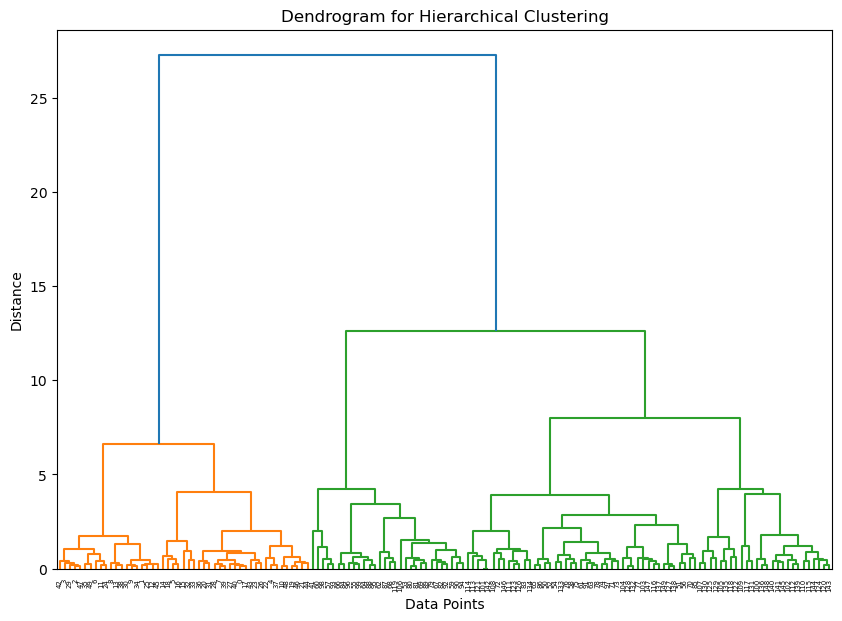

In [9]:
# B) Hierarchical Clustering
Z = linkage(data_scaled, 'ward')

# Visualizing Hierarchical Clustering (Dendrogram)
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

KMeans Clustering:

We load the Iris dataset and scale it using StandardScaler to ensure all features are on the same scale.
We apply KMeans with k=3 (since we know there are 3 species in the Iris dataset).
The results are visualized using a scatter plot of the first two features of the dataset, with each point colored by its assigned cluster.

Hierarchical Clustering:

We use the linkage function with the 'ward' method to perform agglomerative hierarchical clustering.
The dendrogram is plotted to visually represent the hierarchical structure of the clusters.